DATA SCIENCE INTERN AT LETSGROWMORE LGMVIPDECEMBER NAME: AVISHKAR DIGE TASK 4 : Stock-Market-Prediction-and-Forecasting-Using-LSTM

In [20]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [21]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [22]:
data.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [23]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [24]:
data.shape


(2035, 8)

In [25]:
data.dtypes


Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [27]:
data.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [28]:
data.isnull().sum()


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [29]:
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [30]:
data_Turnover = data['Turnover (Lacs)']

In [31]:
data_Turnover.shape

(2035,)

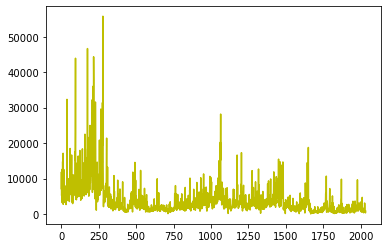

In [32]:
plt.plot(data_Turnover,'y')

In [33]:
scaler = MinMaxScaler(feature_range = (0,1))
data_Turnover = scaler.fit_transform(np.array(data_Turnover).reshape(-1,1))

In [34]:
data_Turnover.shape

(2035, 1)

In [35]:
data_Turnover

array([[0.12788156],
       [0.21219178],
       [0.09353452],
       ...,
       [0.00544294],
       [0.00570964],
       [0.01375712]])

In [36]:
training_size = int(len(data_Turnover) * 0.75)
test_size = len(data_Turnover) - training_size
train_data, test_data = data_Turnover[0:training_size,:], data_Turnover[training_size:len(data_Turnover),:1]

In [37]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [38]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [39]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [40]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 9s 197ms/step - loss: 0.0064 - val_loss: 0.0015
Epoch 2/100
23/23 [==============================] - 3s 145ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 3s 148ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 4/100
23/23 [==============================] - 3s 146ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 5/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0048 - val_loss: 0.0010
Epoch 6/100
23/23 [==============================] - 4s 159ms/step - loss: 0.0049 - val_loss: 0.0010
Epoch 7/100
23/23 [==============================] - 3s 145ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 4s 156ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 9/100
23/23 [==============================] - 3s 136ms/step - loss: 0.0043 - val_loss: 0.0013
Epoch 10/100
23/23 [==============================] - 3s 136ms/step - loss: 0.0043 - val_lo

Epoch 79/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0037 - val_loss: 7.7471e-04
Epoch 80/100
23/23 [==============================] - 3s 136ms/step - loss: 0.0035 - val_loss: 8.2124e-04
Epoch 81/100
23/23 [==============================] - 3s 137ms/step - loss: 0.0035 - val_loss: 7.9745e-04
Epoch 82/100
23/23 [==============================] - 3s 136ms/step - loss: 0.0035 - val_loss: 7.8281e-04
Epoch 83/100
23/23 [==============================] - 3s 137ms/step - loss: 0.0034 - val_loss: 7.9342e-04
Epoch 84/100
23/23 [==============================] - 3s 151ms/step - loss: 0.0035 - val_loss: 7.2916e-04
Epoch 85/100
23/23 [==============================] - 3s 142ms/step - loss: 0.0035 - val_loss: 7.9565e-04
Epoch 86/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0034 - val_loss: 8.6862e-04
Epoch 87/100
23/23 [==============================] - 3s 141ms/step - loss: 0.0034 - val_loss: 7.8243e-04
Epoch 88/100
23/23 [==========================

In [43]:
# predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [44]:
#Transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [45]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

4968.100665962026

In [46]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

1593.7681397470599

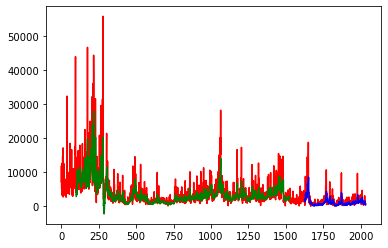

In [47]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_Turnover)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_Turnover)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_Turnover) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_Turnover),'r')
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'b')
plt.show()

In [48]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [50]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape





(1, 302)

In [51]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [52]:
lst_output=[]
n_steps=301
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.03100773 0.01530079 0.0095452  0.01300943 0.02771993 0.02462398
 0.01612548 0.00864226 0.00763308 0.03609405 0.00707922 0.00772371
 0.01824867 0.01178721 0.02969559 0.01450805 0.01799435 0.02972359
 0.0180683  0.01723912 0.02447825 0.02437397 0.02650757 0.05527779
 0.02594546 0.02073206 0.0278111  0.03533488 0.04122417 0.03124464
 0.03095461 0.0330218  0.06299181 0.1031271  0.05610086 0.04028121
 0.07187008 0.19110489 0.02458432 0.00861606 0.01125255 0.02673784
 0.0353058  0.06543123 0.05301766 0.04240296 0.02225168 0.01297641
 0.00974604 0.00997774 0.02122006 0.01424817 0.0138937  0.01116568
 0.01838381 0.01564018 0.01824149 0.02899241 0.02790084 0.06987809
 0.12824069 0.04039123 0.04062975 0.02023815 0.02103322 0.02026651
 0.01544581 0.02477869 0.0101468  0.01003338 0.02091621 0.02369215
 0.00968035 0.01247352 0.02465234 0.05497789 0.01000376 0.02005562
 0.09096515 0.00784216 0.00500215 0.01972898 0.05565343 0.03197151
 0.02511574 0.01144549 0.0060668  0.02151817 0.037

3 day output [[0.00150819]]
4 day input [0.02771993 0.02462398 0.01612548 0.00864226 0.00763308 0.03609405
 0.00707922 0.00772371 0.01824867 0.01178721 0.02969559 0.01450805
 0.01799435 0.02972359 0.0180683  0.01723912 0.02447825 0.02437397
 0.02650757 0.05527779 0.02594546 0.02073206 0.0278111  0.03533488
 0.04122417 0.03124464 0.03095461 0.0330218  0.06299181 0.1031271
 0.05610086 0.04028121 0.07187008 0.19110489 0.02458432 0.00861606
 0.01125255 0.02673784 0.0353058  0.06543123 0.05301766 0.04240296
 0.02225168 0.01297641 0.00974604 0.00997774 0.02122006 0.01424817
 0.0138937  0.01116568 0.01838381 0.01564018 0.01824149 0.02899241
 0.02790084 0.06987809 0.12824069 0.04039123 0.04062975 0.02023815
 0.02103322 0.02026651 0.01544581 0.02477869 0.0101468  0.01003338
 0.02091621 0.02369215 0.00968035 0.01247352 0.02465234 0.05497789
 0.01000376 0.02005562 0.09096515 0.00784216 0.00500215 0.01972898
 0.05565343 0.03197151 0.02511574 0.01144549 0.0060668  0.02151817
 0.0379317  0.01821636 

6 day output [[-0.00202799]]
7 day input [ 0.00864226  0.00763308  0.03609405  0.00707922  0.00772371  0.01824867
  0.01178721  0.02969559  0.01450805  0.01799435  0.02972359  0.0180683
  0.01723912  0.02447825  0.02437397  0.02650757  0.05527779  0.02594546
  0.02073206  0.0278111   0.03533488  0.04122417  0.03124464  0.03095461
  0.0330218   0.06299181  0.1031271   0.05610086  0.04028121  0.07187008
  0.19110489  0.02458432  0.00861606  0.01125255  0.02673784  0.0353058
  0.06543123  0.05301766  0.04240296  0.02225168  0.01297641  0.00974604
  0.00997774  0.02122006  0.01424817  0.0138937   0.01116568  0.01838381
  0.01564018  0.01824149  0.02899241  0.02790084  0.06987809  0.12824069
  0.04039123  0.04062975  0.02023815  0.02103322  0.02026651  0.01544581
  0.02477869  0.0101468   0.01003338  0.02091621  0.02369215  0.00968035
  0.01247352  0.02465234  0.05497789  0.01000376  0.02005562  0.09096515
  0.00784216  0.00500215  0.01972898  0.05565343  0.03197151  0.02511574
  0.01144549

9 day output [[-0.00546723]]
10 day input [ 0.00707922  0.00772371  0.01824867  0.01178721  0.02969559  0.01450805
  0.01799435  0.02972359  0.0180683   0.01723912  0.02447825  0.02437397
  0.02650757  0.05527779  0.02594546  0.02073206  0.0278111   0.03533488
  0.04122417  0.03124464  0.03095461  0.0330218   0.06299181  0.1031271
  0.05610086  0.04028121  0.07187008  0.19110489  0.02458432  0.00861606
  0.01125255  0.02673784  0.0353058   0.06543123  0.05301766  0.04240296
  0.02225168  0.01297641  0.00974604  0.00997774  0.02122006  0.01424817
  0.0138937   0.01116568  0.01838381  0.01564018  0.01824149  0.02899241
  0.02790084  0.06987809  0.12824069  0.04039123  0.04062975  0.02023815
  0.02103322  0.02026651  0.01544581  0.02477869  0.0101468   0.01003338
  0.02091621  0.02369215  0.00968035  0.01247352  0.02465234  0.05497789
  0.01000376  0.02005562  0.09096515  0.00784216  0.00500215  0.01972898
  0.05565343  0.03197151  0.02511574  0.01144549  0.0060668   0.02151817
  0.037931

12 day output [[-0.00919121]]
13 day input [ 0.01178721  0.02969559  0.01450805  0.01799435  0.02972359  0.0180683
  0.01723912  0.02447825  0.02437397  0.02650757  0.05527779  0.02594546
  0.02073206  0.0278111   0.03533488  0.04122417  0.03124464  0.03095461
  0.0330218   0.06299181  0.1031271   0.05610086  0.04028121  0.07187008
  0.19110489  0.02458432  0.00861606  0.01125255  0.02673784  0.0353058
  0.06543123  0.05301766  0.04240296  0.02225168  0.01297641  0.00974604
  0.00997774  0.02122006  0.01424817  0.0138937   0.01116568  0.01838381
  0.01564018  0.01824149  0.02899241  0.02790084  0.06987809  0.12824069
  0.04039123  0.04062975  0.02023815  0.02103322  0.02026651  0.01544581
  0.02477869  0.0101468   0.01003338  0.02091621  0.02369215  0.00968035
  0.01247352  0.02465234  0.05497789  0.01000376  0.02005562  0.09096515
  0.00784216  0.00500215  0.01972898  0.05565343  0.03197151  0.02511574
  0.01144549  0.0060668   0.02151817  0.0379317   0.01821636  0.00226264
  0.006182

15 day output [[-0.0131158]]
16 day input [ 0.01799435  0.02972359  0.0180683   0.01723912  0.02447825  0.02437397
  0.02650757  0.05527779  0.02594546  0.02073206  0.0278111   0.03533488
  0.04122417  0.03124464  0.03095461  0.0330218   0.06299181  0.1031271
  0.05610086  0.04028121  0.07187008  0.19110489  0.02458432  0.00861606
  0.01125255  0.02673784  0.0353058   0.06543123  0.05301766  0.04240296
  0.02225168  0.01297641  0.00974604  0.00997774  0.02122006  0.01424817
  0.0138937   0.01116568  0.01838381  0.01564018  0.01824149  0.02899241
  0.02790084  0.06987809  0.12824069  0.04039123  0.04062975  0.02023815
  0.02103322  0.02026651  0.01544581  0.02477869  0.0101468   0.01003338
  0.02091621  0.02369215  0.00968035  0.01247352  0.02465234  0.05497789
  0.01000376  0.02005562  0.09096515  0.00784216  0.00500215  0.01972898
  0.05565343  0.03197151  0.02511574  0.01144549  0.0060668   0.02151817
  0.0379317   0.01821636  0.00226264  0.00618256  0.00268459  0.00322068
  0.002942

18 day output [[-0.01710003]]
19 day input [ 0.01723912  0.02447825  0.02437397  0.02650757  0.05527779  0.02594546
  0.02073206  0.0278111   0.03533488  0.04122417  0.03124464  0.03095461
  0.0330218   0.06299181  0.1031271   0.05610086  0.04028121  0.07187008
  0.19110489  0.02458432  0.00861606  0.01125255  0.02673784  0.0353058
  0.06543123  0.05301766  0.04240296  0.02225168  0.01297641  0.00974604
  0.00997774  0.02122006  0.01424817  0.0138937   0.01116568  0.01838381
  0.01564018  0.01824149  0.02899241  0.02790084  0.06987809  0.12824069
  0.04039123  0.04062975  0.02023815  0.02103322  0.02026651  0.01544581
  0.02477869  0.0101468   0.01003338  0.02091621  0.02369215  0.00968035
  0.01247352  0.02465234  0.05497789  0.01000376  0.02005562  0.09096515
  0.00784216  0.00500215  0.01972898  0.05565343  0.03197151  0.02511574
  0.01144549  0.0060668   0.02151817  0.0379317   0.01821636  0.00226264
  0.00618256  0.00268459  0.00322068  0.00294214  0.00304803  0.0035143
  0.016987

21 day output [[-0.02108823]]
22 day input [ 0.02650757  0.05527779  0.02594546  0.02073206  0.0278111   0.03533488
  0.04122417  0.03124464  0.03095461  0.0330218   0.06299181  0.1031271
  0.05610086  0.04028121  0.07187008  0.19110489  0.02458432  0.00861606
  0.01125255  0.02673784  0.0353058   0.06543123  0.05301766  0.04240296
  0.02225168  0.01297641  0.00974604  0.00997774  0.02122006  0.01424817
  0.0138937   0.01116568  0.01838381  0.01564018  0.01824149  0.02899241
  0.02790084  0.06987809  0.12824069  0.04039123  0.04062975  0.02023815
  0.02103322  0.02026651  0.01544581  0.02477869  0.0101468   0.01003338
  0.02091621  0.02369215  0.00968035  0.01247352  0.02465234  0.05497789
  0.01000376  0.02005562  0.09096515  0.00784216  0.00500215  0.01972898
  0.05565343  0.03197151  0.02511574  0.01144549  0.0060668   0.02151817
  0.0379317   0.01821636  0.00226264  0.00618256  0.00268459  0.00322068
  0.00294214  0.00304803  0.0035143   0.0169875   0.00917566  0.01074463
  0.00493

 -0.02374616]
24 day output [[-0.02507483]]
25 day input [ 0.02073206  0.0278111   0.03533488  0.04122417  0.03124464  0.03095461
  0.0330218   0.06299181  0.1031271   0.05610086  0.04028121  0.07187008
  0.19110489  0.02458432  0.00861606  0.01125255  0.02673784  0.0353058
  0.06543123  0.05301766  0.04240296  0.02225168  0.01297641  0.00974604
  0.00997774  0.02122006  0.01424817  0.0138937   0.01116568  0.01838381
  0.01564018  0.01824149  0.02899241  0.02790084  0.06987809  0.12824069
  0.04039123  0.04062975  0.02023815  0.02103322  0.02026651  0.01544581
  0.02477869  0.0101468   0.01003338  0.02091621  0.02369215  0.00968035
  0.01247352  0.02465234  0.05497789  0.01000376  0.02005562  0.09096515
  0.00784216  0.00500215  0.01972898  0.05565343  0.03197151  0.02511574
  0.01144549  0.0060668   0.02151817  0.0379317   0.01821636  0.00226264
  0.00618256  0.00268459  0.00322068  0.00294214  0.00304803  0.0035143
  0.0169875   0.00917566  0.01074463  0.00493826  0.00617879  0.00855

29 day output [[-0.03169931]]
[[0.006297128275036812], [0.004362326115369797], [0.002921534702181816], [0.0015081912279129028], [0.0002676062285900116], [-0.0009011793881654739], [-0.00202799029648304], [-0.00315164215862751], [-0.004293743520975113], [-0.005467228591442108], [-0.0066762641072273254], [-0.007919266819953918], [-0.009191205725073814], [-0.010485513135790825], [-0.011795612052083015], [-0.013115795329213142], [-0.01444174163043499], [-0.015770429745316505], [-0.017100030556321144], [-0.01842968724668026], [-0.01975909434258938], [-0.021088233217597008], [-0.0224172230809927], [-0.023746157065033913], [-0.025074826553463936], [-0.026402974501252174], [-0.027730101719498634], [-0.02905566804111004], [-0.030378947034478188], [-0.03169931471347809]]


In [53]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [54]:
df = data_Turnover.tolist()
df.extend(lst_output)

In [55]:
len(data_Turnover)

2035